# mRNA

All data manipulation was done before the start of this quarto manuscript project. Code is in: C:/Users/alosvendsen/OneDrive - Syddansk Universitet/PhD/R_code/manuscript_1 And copied to this project: /notebooks/qPCR/old_qPCR_import

Donor 1: timepoints = 72 and 120 hours Donor 2: timepoints = 24, 72, and 120 hours Donor 2: timepoints = 24, 72, and 120 hours

## Setup

In [ ]:

groundhog.date <- "2024-01-01"
groundhog::meta.groundhog(date = groundhog.date)


Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript_one

Successfully attached 'here_1.0.1'

Successfully attached 'data.table_1.14.10'

Successfully attached 'ggplot2_3.4.4'

## Finalize the data and save the data table

### Load data, remove 0.001 ng/ml cytokine concentrations, calculate means for each experiment.

In [ ]:
#### Load data, filter data and calculate geometric means
# data <- readRDS(here("notebooks/qPCR/data_processed/final_dataframe.rds"))
# 
# # Remove the lowest concentrations of cytokines, since not used in all 
# # Experiments. Note 24 hour time points was only used in one experiment
# plot_data <- data[!treatment %chin% c("0.001 ng/ml IL-1B", "0.001 ng/ml IL-6")]
# 
# 
# # Calculate the mean expression grouped by experiment, condition, treatment, and time. USE GEOMETRIC MEAN when averaging normalized expression (RQ) values. 
# plot_data[,
#           bio_group_mean_expression := geometric_mean(normalized_expression),
#           by = .(experiment, condition, treatment, time, target)
#           ]
# 
# # Save the data
# saveRDS(plot_data, here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))


In [ ]:
# rmv <- ls()[!grepl(x =ls(), pattern = "geometric")]
# 
# rm(list = rmv)


## Plots

In [ ]:
plot_data <- readRDS(here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))


#### 3A4 IL-6

Subset

In [ ]:
# Subset for 3A4 and IL-6
cyp3A4_IL6 <- plot_data[treatment != "0.0001% BSA" & condition == "IL-6" & target == "CYP3A4"]
cyp3A4_IL6[,
           time_means := geometric_mean(bio_group_mean_expression),
           by = .(treatment, time)
           ]

# Get the average downregulation grouped by treatment. Ie, the average of the average grouped by time. 
cyp3A4_IL6[order(treatment),
           .(down = mean(time_means),
             down_pct = 100 - mean(time_means) *100),
           by = .(treatment)]


         treatment       down  down_pct
1: 0.01 ng/ml IL-6 0.96853976  3.146024
2:  0.1 ng/ml IL-6 0.85684974 14.315026
3:    1 ng/ml IL-6 0.33064588 66.935412
4:   10 ng/ml IL-6 0.06374017 93.625983

Plot 3a4 il-6

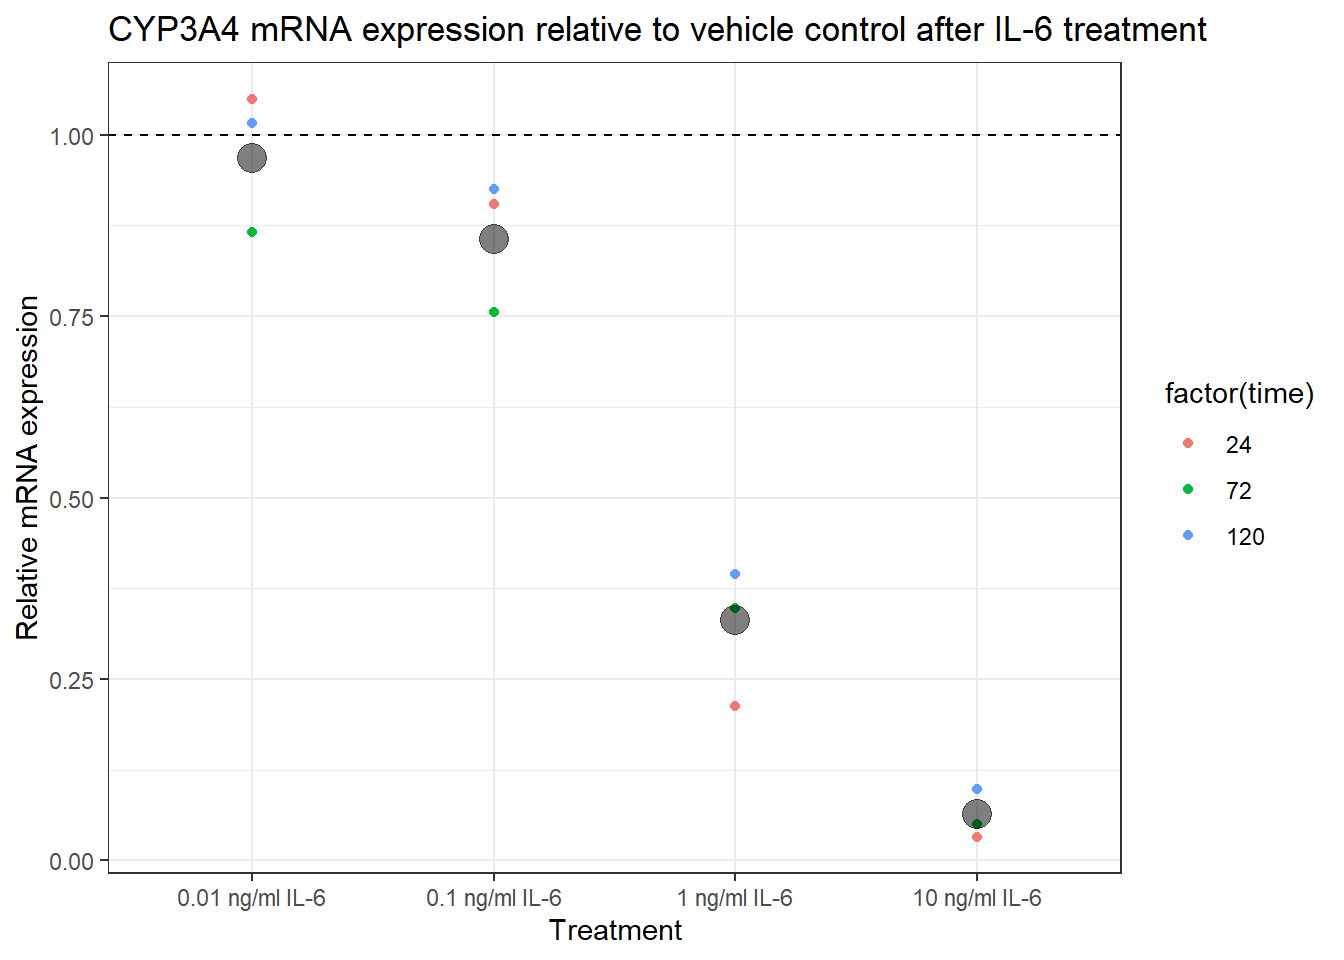

In [ ]:

ggplot(data = cyp3A4_IL6, aes(x = treatment, y = time_means, color = factor(time))) +
  geom_point() +
  stat_summary(fun = "mean", geom = "point", color = "black", size = 5, alpha = 0.5) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-6 treatment") +
  ylab("Relative mRNA expression") +
  xlab("Treatment") +
  theme_bw()


Plot individual means of 120 hour treatment from each donor.

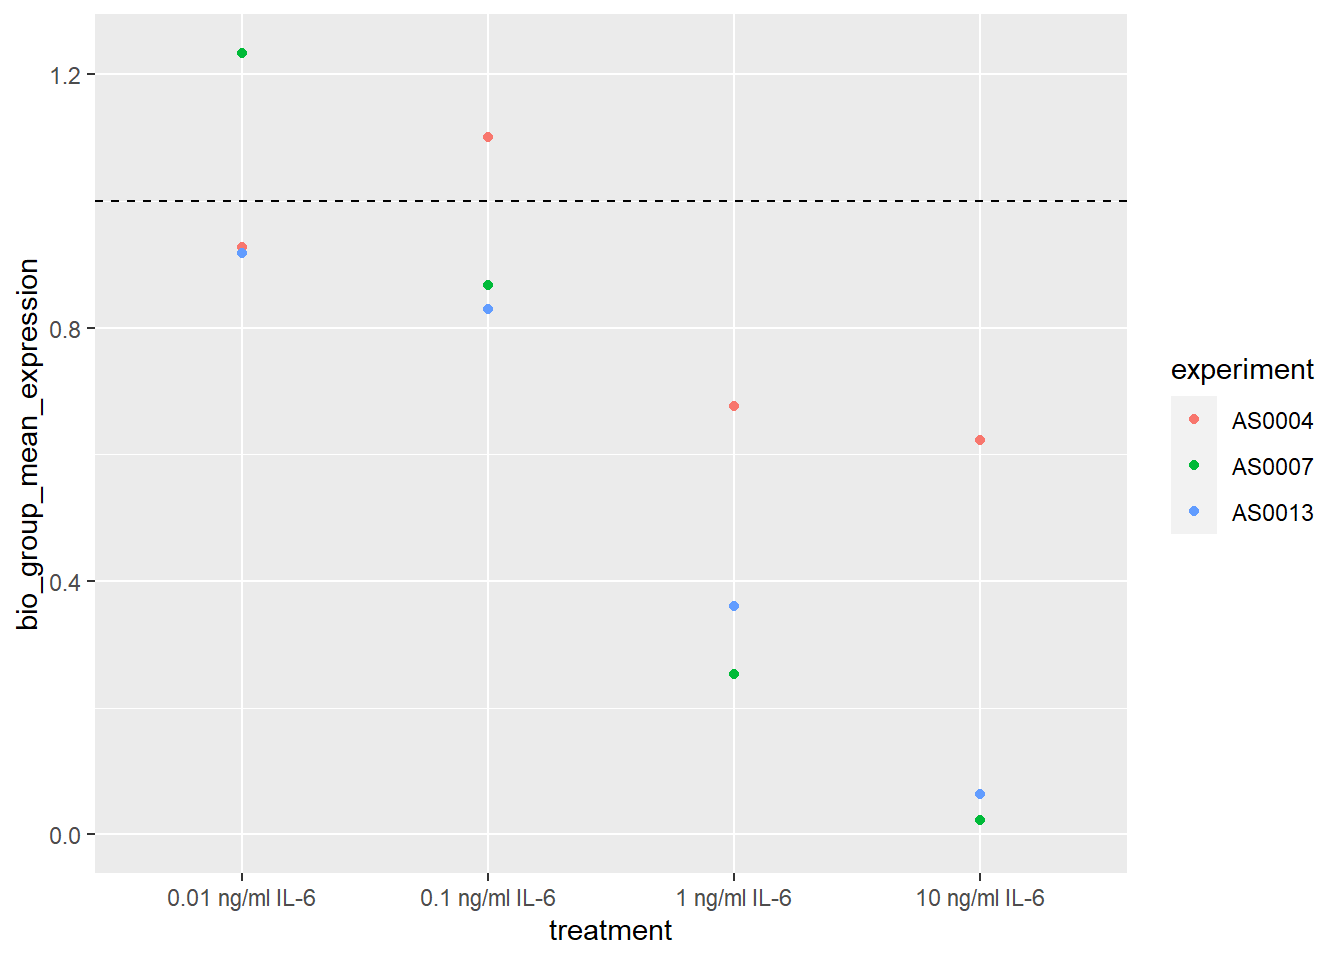

In [ ]:

ggplot(data = cyp3A4_IL6[time == 120], aes(x = treatment, y = bio_group_mean_expression)) +
  geom_point(aes(color = experiment)) +
  scale_y_continuous(limits = c(0, NA)) +
  geom_hline(yintercept = 1, linetype = "dashed")


#### 3A4 IL-1B

Subset data

In [ ]:
# Subset for 3A4 and IL-1B
cyp3A4_IL1B <- plot_data[treatment != "0.0001% BSA" & condition == "IL-1B" & target == "CYP3A4"]

cyp3A4_IL1B[,
           time_means := geometric_mean(bio_group_mean_expression),
           by = .(treatment, time)
           ]

# Get the average downregulation grouped by treatment. Ie, the average of the average grouped by time. 
cyp3A4_IL1B[order(treatment),
           .(down = mean(time_means),
             down_pct = 100 - mean(time_means) *100),
           by = .(treatment)]


          treatment      down down_pct
1: 0.01 ng/ml IL-1B 0.8556492 14.43508
2:  0.1 ng/ml IL-1B 0.6039612 39.60388
3:    1 ng/ml IL-1B 0.2979700 70.20300
4:   10 ng/ml IL-1B 0.1595929 84.04071

  
Plot IL-1B CYP3A4

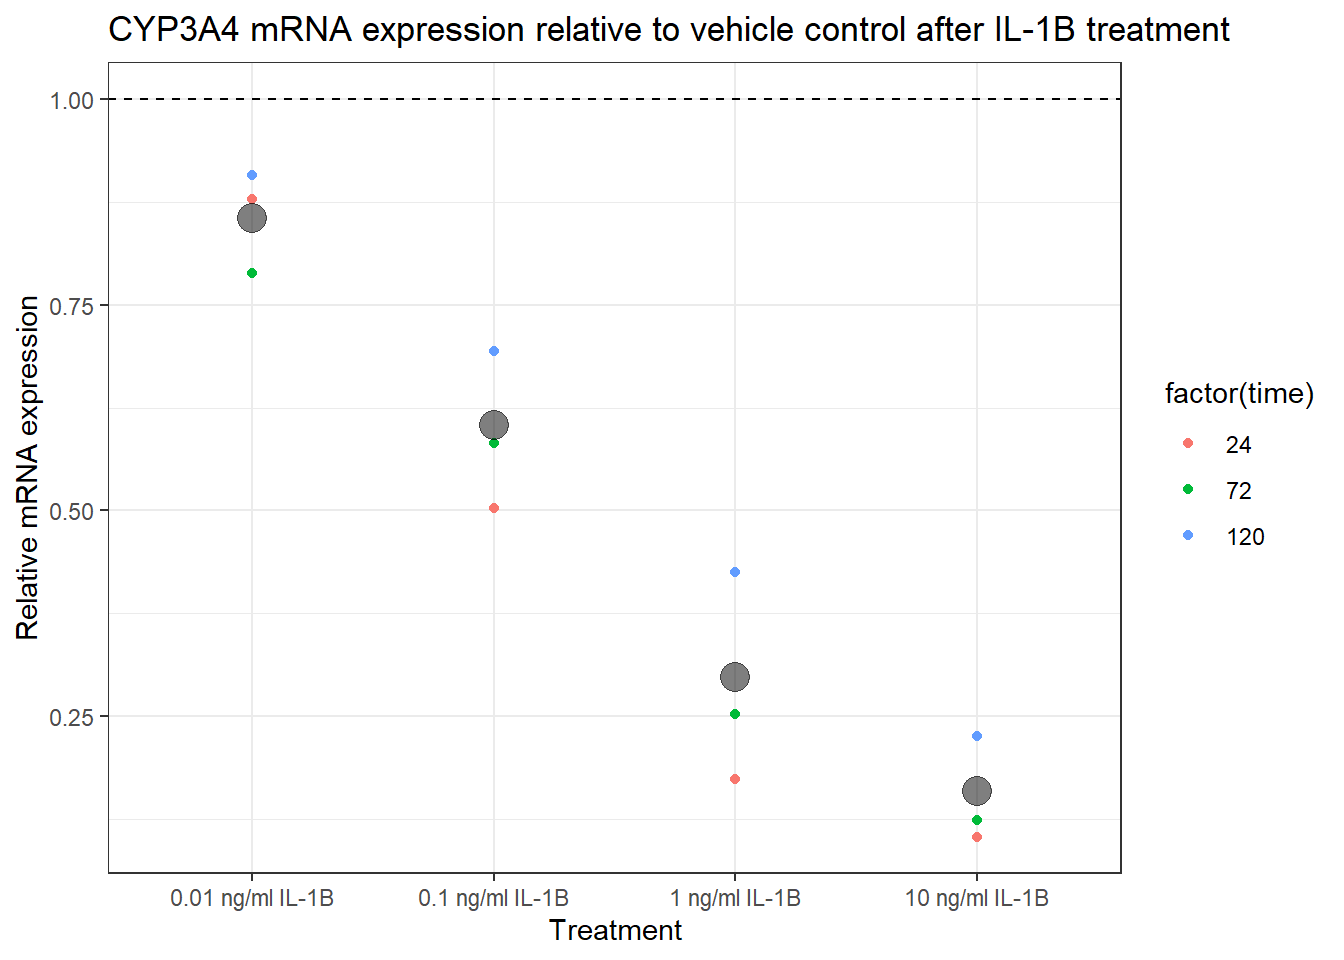

In [ ]:

ggplot(data = cyp3A4_IL1B, aes(x = treatment, y = time_means, color = factor(time))) +
  geom_point() +
  stat_summary(fun = "mean", geom = "point", color = "black", size = 5, alpha = 0.5) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-1B treatment") +
  ylab("Relative mRNA expression") +
  xlab("Treatment") +
  theme_bw()


Plot 120 hour means of each donor

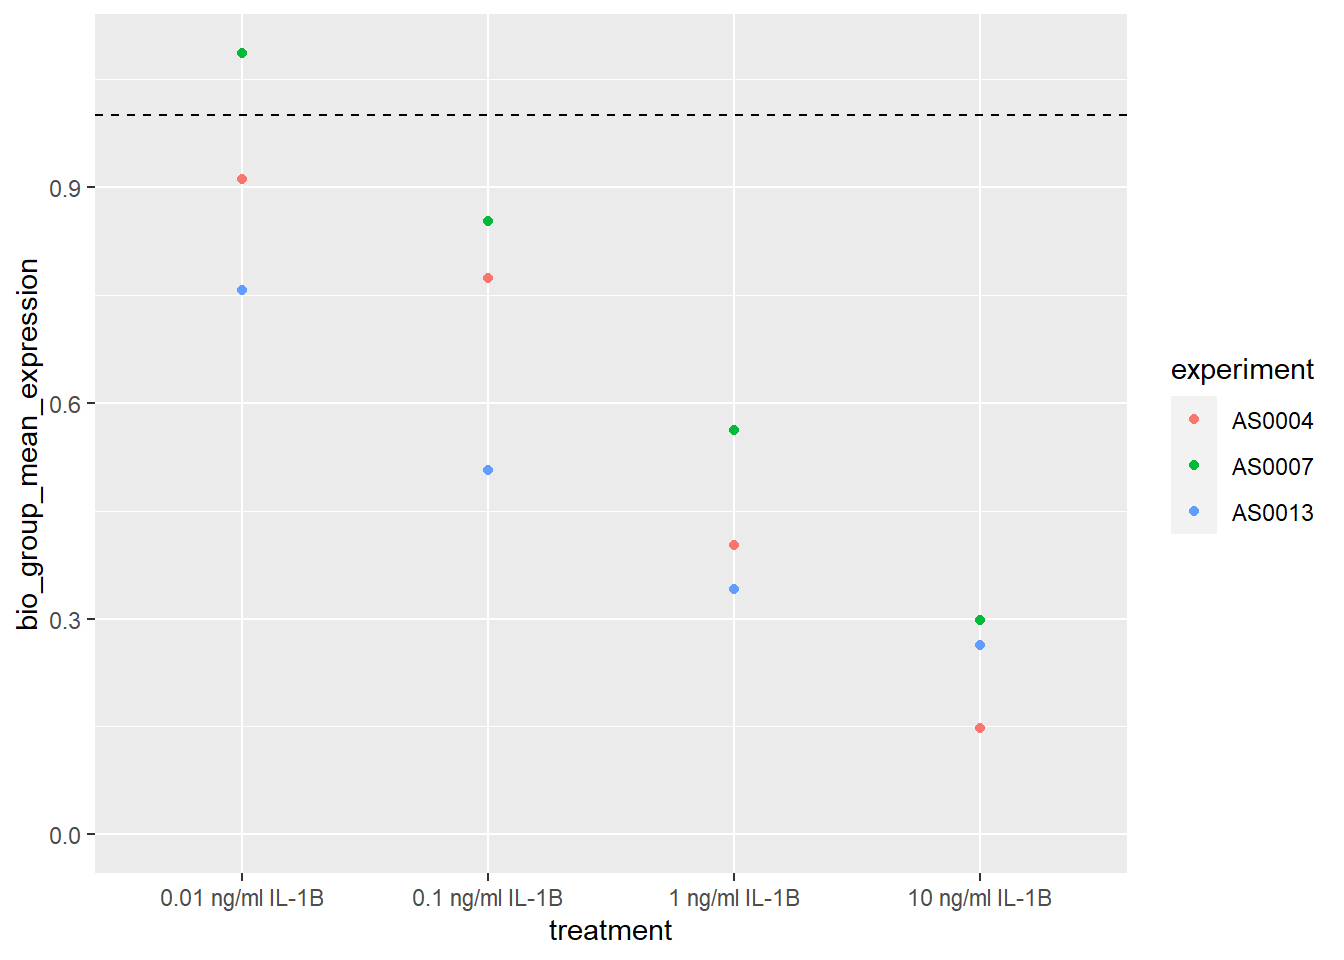

In [ ]:
ggplot(data = cyp3A4_IL1B[time == 120], aes(x = treatment, y = bio_group_mean_expression)) +
  geom_point(aes(color = experiment)) +
  scale_y_continuous(limits = c(0, NA)) +
  geom_hline(yintercept = 1, linetype = "dashed")


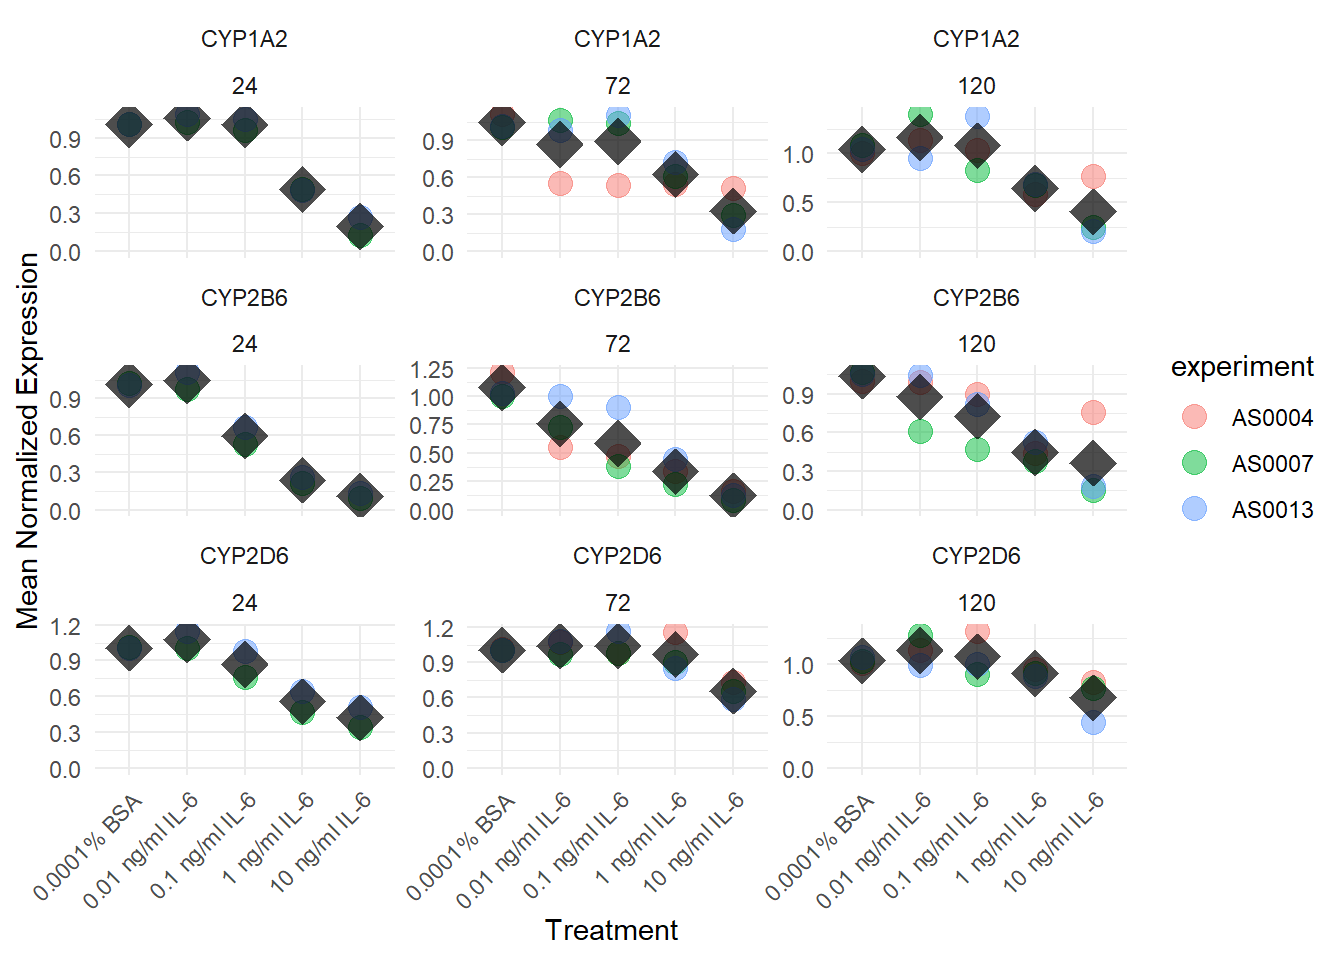

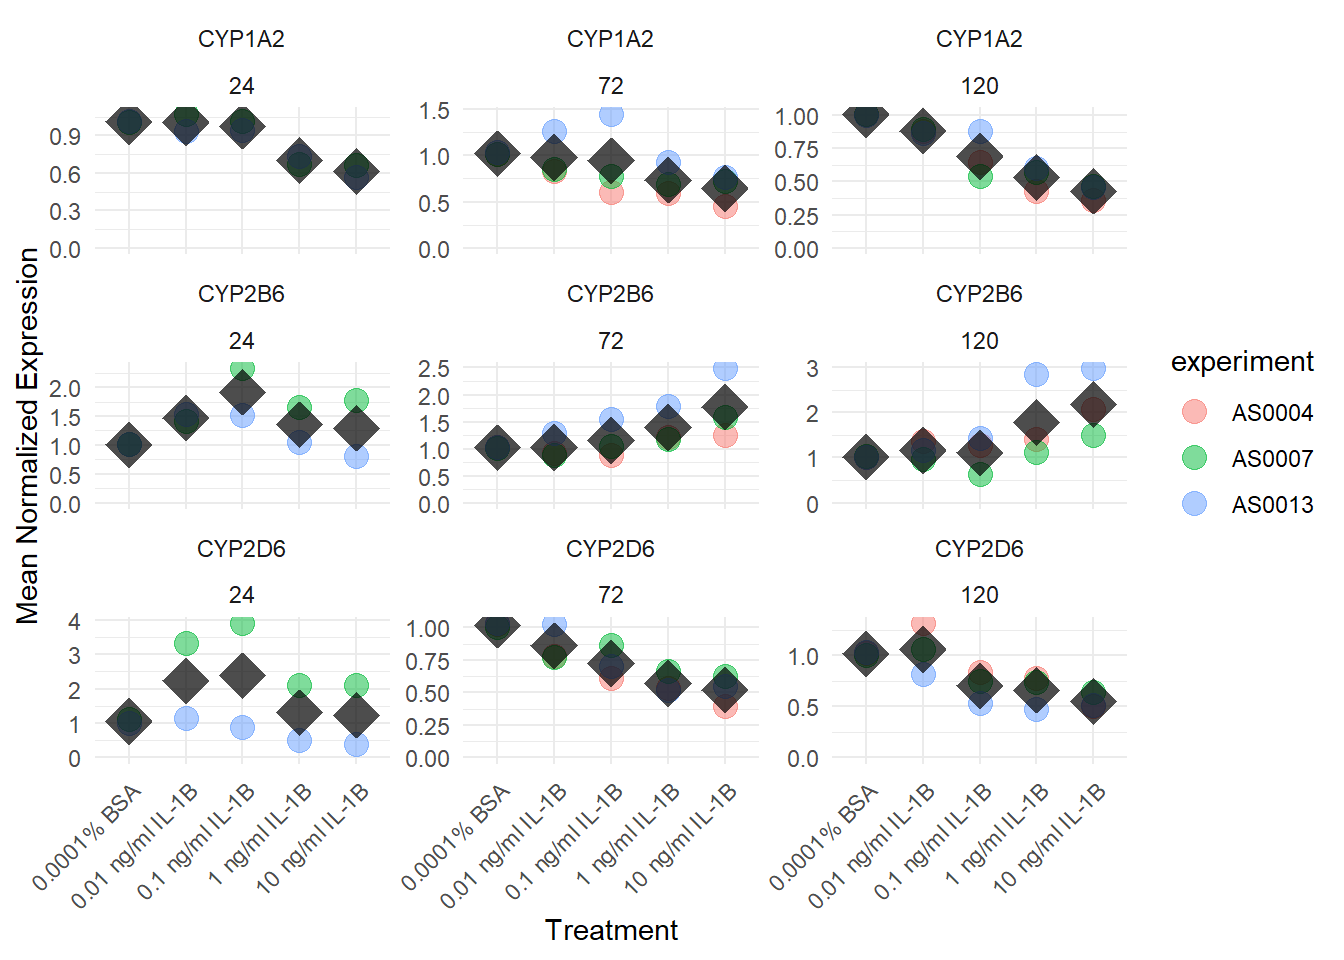

In [ ]:
# Filter for CYP enzymes only, remove lowest concentration
cyp_data <- plot_data[target %like% "CYP" & !treatment %like% "0.001"]

# Split data based on condition, and remove 3A4 since done separately. 
cyp_data_IL6 <- cyp_data[condition == "IL-6" & target != "CYP3A4"]
cyp_data_IL1B <- cyp_data[condition == "IL-1B" & target != "CYP3A4"]

# Define a function to create the plot
create_plot <- function(cyp_data) {
  # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
  cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)),
                        by = .(experiment, treatment, target, time)]

  # Calculate the overall mean across experiments
  cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
                                 by = .(treatment, target, time)]

  # Create and return the plot
  ggplot() +
    geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
    geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
               color = "black", size = 8, shape = 18, alpha = 0.7) +
    scale_y_continuous(limits = c(0,NA)) +
    facet_wrap(~ target + time, scales = "free_y") +
    labs(x = "Treatment", y = "Mean Normalized Expression") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Create plots
plot_IL6 <- create_plot(cyp_data_IL6)
plot_IL1B <- create_plot(cyp_data_IL1B)

# You can now view, save, or further manipulate these plots:
plot_IL6
plot_IL1B


In [ ]:
cyp_data_IL1B[,
              mean_normalized_expression := mean(normalized_expression, na.rm = TRUE),
              by = .(experiment, treatment, target, time)]

cyp_data_IL1B[,
              overall_mean_normalized_expression := mean(mean_normalized_expression, na.rm = TRUE),
              by = .(treatment, target, time)]

cyp3A4_IL1B[]


    experiment condition plate    sample        treatment time target rep_bio
 1:     AS0004     IL-1B     4 AS0004/24   10 ng/ml IL-1B   72 CYP3A4       1
 2:     AS0004     IL-1B     4 AS0004/25   10 ng/ml IL-1B   72 CYP3A4       2
 3:     AS0004     IL-1B     4 AS0004/34  0.1 ng/ml IL-1B   72 CYP3A4       1
 4:     AS0004     IL-1B     4 AS0004/26   10 ng/ml IL-1B   72 CYP3A4       3
 5:     AS0004     IL-1B     4 AS0004/35  0.1 ng/ml IL-1B   72 CYP3A4       2
 6:     AS0004     IL-1B     4 AS0004/27    1 ng/ml IL-1B   72 CYP3A4       1
 7:     AS0004     IL-1B     4 AS0004/36  0.1 ng/ml IL-1B   72 CYP3A4       3
 8:     AS0004     IL-1B     4 AS0004/28    1 ng/ml IL-1B   72 CYP3A4       2
 9:     AS0004     IL-1B     4 AS0004/37 0.01 ng/ml IL-1B   72 CYP3A4       1
10:     AS0004     IL-1B     4 AS0004/29    1 ng/ml IL-1B   72 CYP3A4       3
11:     AS0004     IL-1B     4 AS0004/38 0.01 ng/ml IL-1B   72 CYP3A4       2
12:     AS0004     IL-1B     4 AS0004/39 0.01 ng/ml IL-1B   72 C

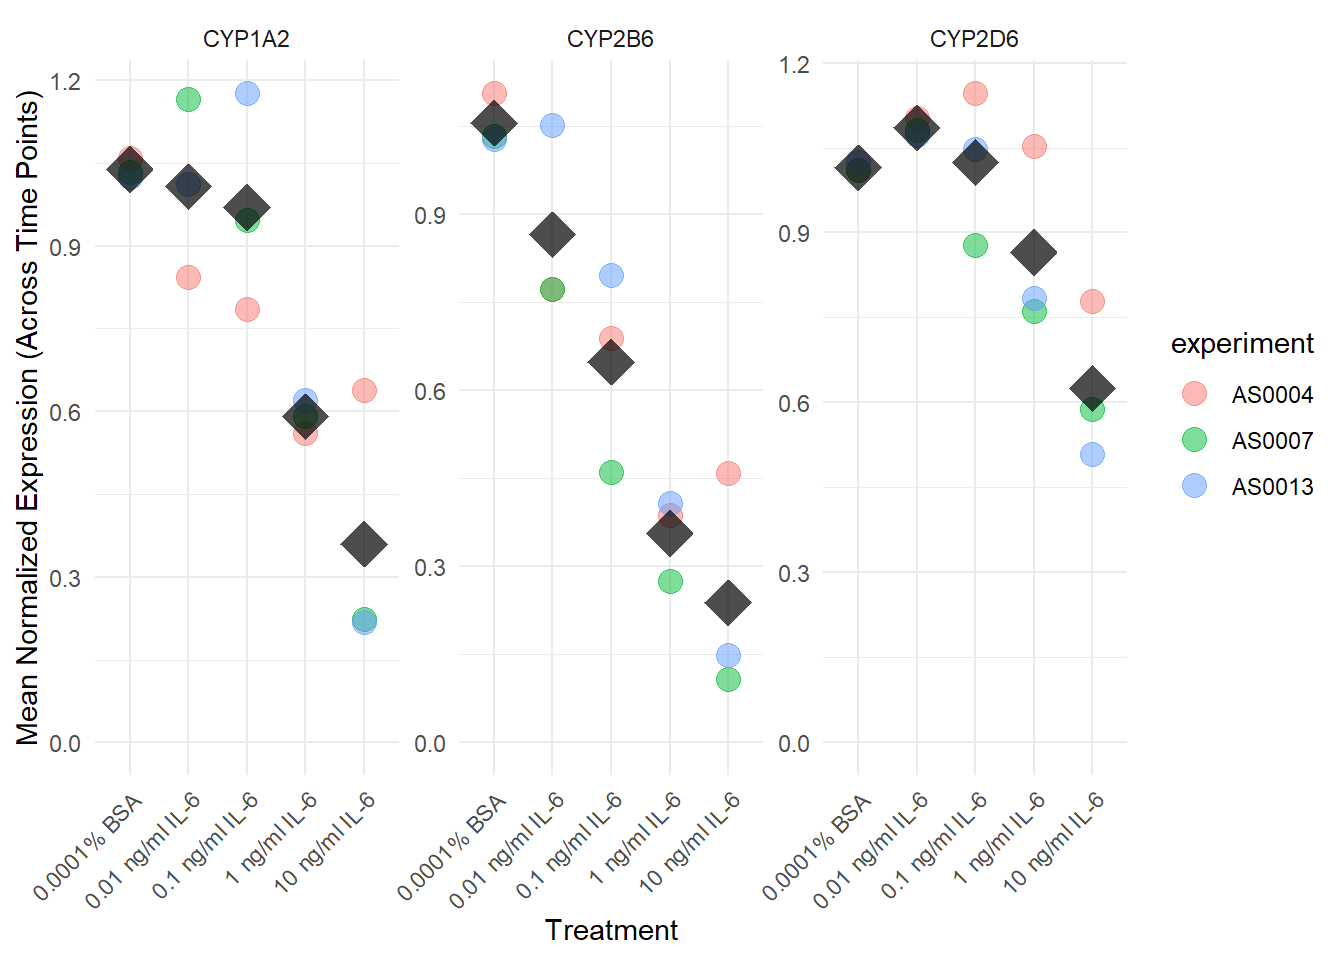

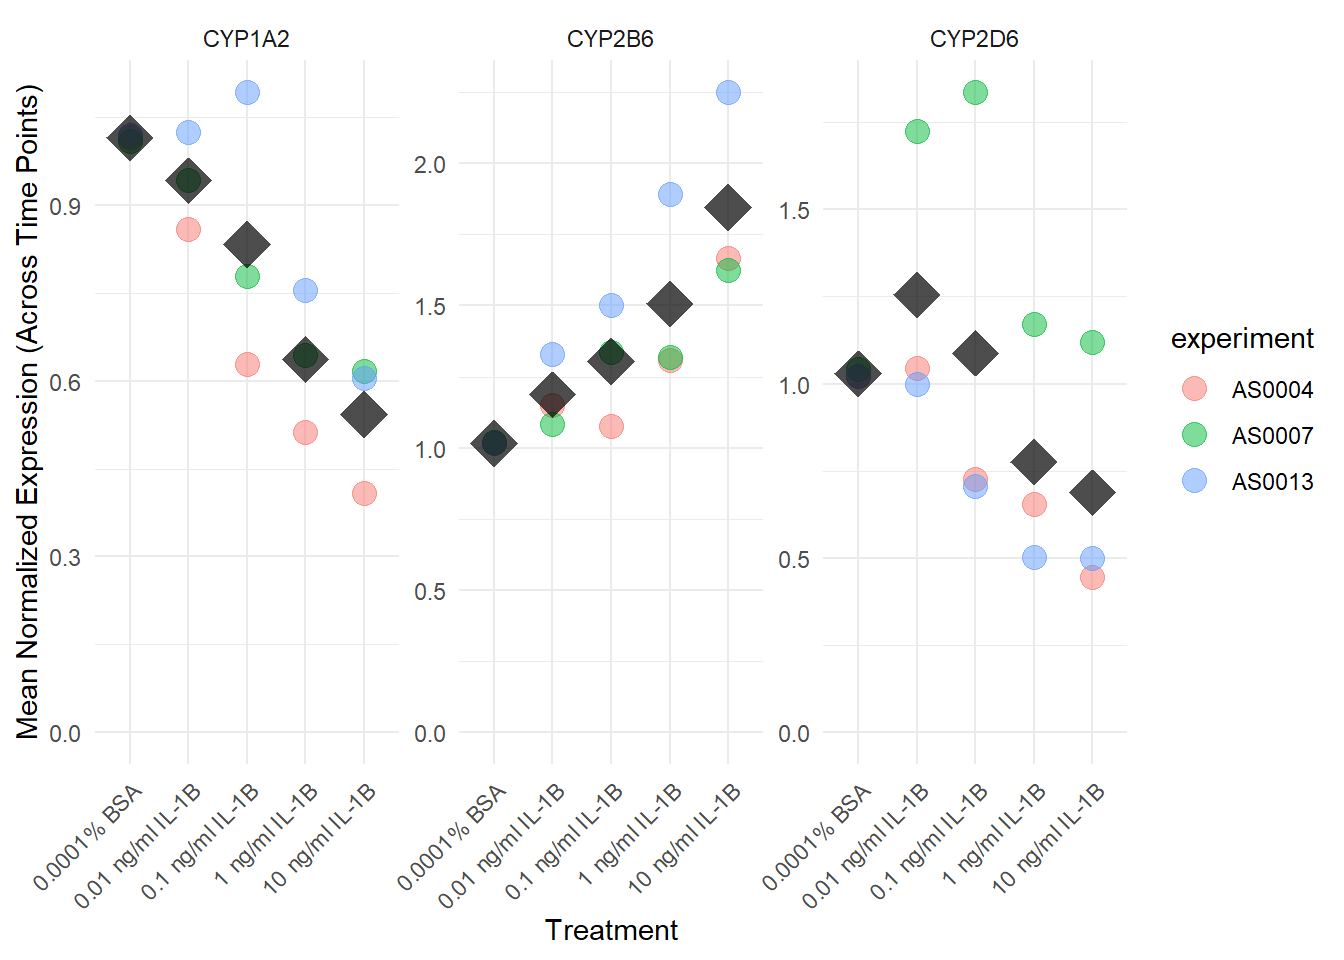

In [ ]:
create_plot_without_time_grouping <- function(cyp_data) {
  # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
  cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)),
                        by = .(experiment, treatment, target)]
  
  # Calculate the overall mean across experiments and time points
  cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
                                 by = .(treatment, target)]
  
  # Create and return the plot
  ggplot() +
    geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
    geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
               color = "black", size = 8, shape = 18, alpha = 0.7) +
    scale_y_continuous(limits = c(0,NA)) +
    facet_wrap(~ target, scales = "free_y") +
    labs(x = "Treatment", y = "Mean Normalized Expression (Across Time Points)") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Use this function to create the new plots
plot_IL6_no_time <- create_plot_without_time_grouping(cyp_data_IL6)
plot_IL1B_no_time <- create_plot_without_time_grouping(cyp_data_IL1B)

# View, save, or manipulate these plots as needed
plot_IL6_no_time
plot_IL1B_no_time
